# Data Analysis on Public Education Dataset

### What is the socioeconomic status of an average student in US colleges?

### 1. Introduction

This analysis aims to explore two key aspects of higher education: the cost of admission and the distribution of gender, ethnicity, and fields of study among colleges. Understanding these factors is crucial in gaining insights into the landscape of higher education and identifying potential patterns or disparities.

* Gender, Ethnicity and Field of Study Distribution among Colleges

* Cost of Admission Analysis for Public / Private School

The first aspect of our analysis focuses on the distribution of gender, ethnicity, and fields of study among colleges. We will explore the gender and ethnicity composition of students across colleges and identify any disparities or underrepresented groups. Additionally, we will examine the distribution of fields of study to understand the choices and interests of students across different disciplines.

The second aspect we will examine is the cost of admission. This analysis will provide an overview of the average admission costs and examine any variations across different types of colleges, such as public, private, or specialized institutions. Further the cost in different geographical locations and its relation to other factors such admission rate and federal loans are explored.


### 2. Data Wrangling

In [18]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from scipy.stats import ttest_ind
import scipy.stats as stats
import numpy as np


# Import API key
#from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [7]:
raw_data = pd.read_csv("data/MERGED2021_22_PP.csv",low_memory=False)

raw_data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


#### 2.1 Data Description

The dataset comprises institution-level data files from 1996-97 through 2020-21, containing aggregate data for each institution. It encompasses a wide range of information on institutional characteristics, enrollment, student aid, costs, and student outcomes. To ensure the accuracy and relevance of our analysis, we focused on the most recent data available.

To facilitate data analysis while minimizing information loss, we organized the dataset into five distinct categories:

* Institutional Characteristics:
This category includes essential details such as institution ID, name, city, state, and ZIP code. It provides key information for identifying and differentiating institutions within the dataset. Additionally, we included data on whether an institution is classified as the main campus and the highest degree awarded by the institution.

* Type:
The type category provides insights into the school type of each institution. It includes data of categorical condition of the school type. This breakdown allows for a comprehensive understanding of the tendency of school type across institutions.

* Majors:
The majors category focuses on the distribution of students across various academic disciplines. It includes information on the percentage of students enrolled in specific majors, such as agriculture, conservation, architecture, ethnic studies, communication, computer science, education, engineering, humanities, sciences, and many others. This data enables an analysis of academic interests and trends within and across institutions.

* Financial Aspects:
The financial aspects category encompasses data related to the cost of admission, tuition fees, instructional expenditure, and financial aid availability. It includes information on the average cost of admission, program-specific admission costs, tuition fees, the percentage of students receiving Pell grants, and the percentage of students with federal loans. These metrics offer insights into the financial considerations and support available to students at different institutions.

* Ethnicity with Gender Breakdown:
The ethnicity with gender breakdown category provides a comprehensive view of the student population by combining ethnicity and gender. It includes enrollment proportions for different demographic groups, such as white males, white females, black males, black females, Hispanic males, Hispanic females, Asian males, Asian females, and more. This breakdown allows for an examination of the representation of various ethnic and gender groups within the student body.

Organizing the data into these five categories enhances the clarity and structure of the dataset, enabling more effective analysis and comparison of public and private colleges in the United States.

#### 2.2 Data Exploration

In [221]:
#pd.set_option('display.max_rows', None)

# Calculate the sum of null values for each column
null_sum = raw_data.isnull().sum()  

# Get the total number of rows in the DataFrame
column_count = len(raw_data)  

 # Calculate the percentage of null values for each column
null_percentage = (null_sum / column_count) 

# Filter the results to include only columns with null percentage less than 30%
filtered_results = null_percentage[null_percentage < 0.3]
print(filtered_results.to_frame())

                                   0
UNITID                      0.000000
OPEID                       0.003057
OPEID6                      0.003057
INSTNM                      0.000000
CITY                        0.000000
...                              ...
BBRR4_PP_NOMALE_DFR         0.000000
BBRR4_PP_NOMALE_NOPROG      0.000000
BBRR4_PP_NOMALE_MAKEPROG    0.000000
BBRR4_PP_NOMALE_PAIDINFULL  0.000000
BBRR4_PP_NOMALE_DISCHARGE   0.000000

[732 rows x 1 columns]


During the data analysis process, we applied a filter to include only columns with null percentages lower than 30%. From this refined list, we carefully selected the columns for further analysis. However, it is worth noting that we made an exception for two significant factors: the cost of admission and the admission rate. Despite these columns exceeding the 30% null threshold, we recognized their importance and decided to include them in our investigation. By doing so, we aimed to ensure a comprehensive evaluation of these crucial aspects, considering their relevance in the context of our study.

In [222]:
select_data = raw_data[[
    "UNITID",
    "INSTNM",
    "CITY",
    "STABBR",
    "ZIP",
    "MAIN",
    "HIGHDEG",
    "LATITUDE",
    "LONGITUDE",
    "CONTROL",
    "OPENADMP",
    "HBCU",
    "PBI",
    "ANNHI",
    "TRIBAL",
    "AANAPII",
    "HSI",
    "NANTI",
    "MENONLY",
    "WOMENONLY",
    "PCIP01",
    "PCIP03",
    "PCIP04",
    "PCIP05",
    "PCIP09",
    "PCIP10",
    "PCIP11",
    "PCIP12",
    "PCIP13",
    "PCIP14",
    "PCIP15",
    "PCIP16",
    "PCIP19",
    "PCIP22",
    "PCIP23",
    "PCIP24",
    "PCIP25",
    "PCIP26",
    "PCIP27",
    "PCIP29",
    "PCIP30",
    "PCIP31",
    "PCIP38",
    "PCIP39",
    "PCIP40",
    "PCIP41",
    "PCIP42",
    "PCIP43",
    "PCIP44",
    "PCIP45",
    "PCIP46",
    "PCIP47",
    "PCIP48",
    "PCIP49",
    "PCIP50",
    "PCIP51",
    "PCIP52",
    "PCIP54",
    "UGDS",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "UGDS_AIAN",
    "UGDS_NHPI",
    "UGDS_2MOR",
    "UGDS_NRA",
    "UGDS_UNKN",
    "COSTT4_A",
    "COSTT4_P",
    "TUITFTE",
    "INEXPFTE",
    "PCTPELL",
    "PCTFLOAN",
    "UG25ABV",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "SCHTYPE", 
    "STUFACR",
    "IRPS_2MOR",
    "IRPS_AIAN",
    "IRPS_ASIAN",
    "IRPS_BLACK",
    "IRPS_HISP",
    "IRPS_NHPI",
    "IRPS_NRA",
    "IRPS_UNKN",
    "IRPS_WHITE",
    "IRPS_WOMEN",
    "IRPS_MEN"
]]

column_dictionary = {
    "UNITID":"id",
    "INSTNM":"name",
    "CITY":"city",
    "STABBR":"state",
    "ZIP":"zipcode",
    # 1: main campus, 0: not main campus
    "MAIN" : "main_campus",
    # "Highest degree awarded 0 Non-degree-granting, 1 Certificate degree, 2 Associate degree, 3 Bachelor's degree, 4 Graduate degree"
    "HIGHDEG":"highest_degree",
    "LATITUDE":"lat",
    "LONGITUDE":"lng",
    "CONTROL" : "control",
    "OPENADMP" : "openadmp",
    # 1: yes, 0: no
    "HBCU":"historicalblack_college",
    "PBI":"black_college",
    "ANNHI":"native_college",
    "TRIBAL":"tribal_college",
    "AANAPII":"asian_college",
    "HSI":"hispanic_college",
    "NANTI":"native_college",
    "MENONLY":"men_college",
    "WOMENONLY":"women_college",
    "PCIP01":"percentage_of_agriculture_major",
    "PCIP03":"percentage_of_conservation_major",
    "PCIP04":"percentage_of_architecture_major",
    "PCIP05":"percentage_of_ethniic_major",
    "PCIP09":"percentage_of_communication_major",
    "PCIP10":"percentage_of_techincalsupport_major",
    "PCIP11":"percentage_of_computerscience_major",
    "PCIP12":"percentage_of_culinary_major",
    "PCIP13":"percentage_of_education_major",
    "PCIP14":"percentage_of_engineer_major",
    "PCIP15":"percentage_of_engineertech_major",
    "PCIP16":"percentage_of_language_major",
    "PCIP19":"percentage_of_family_major",
    "PCIP22":"percentage_of_legal_major",
    "PCIP23":"percentage_of_english_major",
    "PCIP24":"percentage_of_humanities_major",
    "PCIP25":"percentage_of_science_major",
    "PCIP26":"percentage_of_biology_major",
    "PCIP27":"percentage_of_math_major",
    "PCIP29":"percentage_of_appliedscience_major",
    "PCIP30":"percentage_of_interdisciplinary_major",
    "PCIP31":"percentage_of_fitness_major",
    "PCIP38":"percentage_of_philosophy_major",
    "PCIP39":"percentage_of_theology_major",
    "PCIP40":"percentage_of_physic_major",
    "PCIP41":"percentage_of_sciencetech_major",
    "PCIP42":"percentage_of_psychology_major",
    "PCIP43":"percentage_of_security_major",
    "PCIP44":"percentage_of_administration_major",
    "PCIP45":"percentage_of_sociology_major",
    "PCIP46":"percentage_of_trade_major",
    "PCIP47":"percentage_of_mechanic_major",
    "PCIP48":"percentage_of_production_major",
    "PCIP49":"percentage_of_transportation_major",
    "PCIP50":"percentage_of_visualart_major",
    "PCIP51":"percentage_of_health_major",
    "PCIP52":"percentage_of_business_major",
    "PCIP54":"percentage_of_history_major",
    "UGDS":"student_count",
    "UGDS_WHITE":"enrollment_proportion_white",
    "UGDS_BLACK":"enrollment_proportion_black",
    "UGDS_HISP":"enrollment_proportion_hispanic",
    "UGDS_ASIAN":"enrollment_proportion_asian",
    "UGDS_AIAN":"enrollment_proportion_native",
    "UGDS_NHPI":"enrollment_proportion_pacific",
    "UGDS_2MOR":"enrollment_proportion_mix",
    "UGDS_NRA":"enrollment_proportion_nonresident",
    "UGDS_UNKN":"enrollment_proportion_unknown",
    "COSTT4_A" : "cost_of_admission",
    "COSTT4_P" : "cost_of_admission_p",
    "TUITFTE":"tuition",
    "INEXPFTE":"instructional_expenditure",
    "PCTPELL":"percentage_of_pellgrant",
    "PCTFLOAN":"percentage_of_federalloan",
    "UG25ABV":"pecentage_of_over25",
    "UGDS_MEN":"enrollment_percentage_man",
    "UGDS_WOMEN":"enrollment_percentage_women",
    "SCHTYPE": "public/private",
    "STUFACR":"faculity_ratio_student",
    "IRPS_2MOR":"faculity_ratio_mix",
    "IRPS_AIAN":"faculity_ratio_native",
    "IRPS_ASIAN":"faculity_ratio_asian",
    "IRPS_BLACK":"faculity_ratio_black",
    "IRPS_HISP":"faculity_ratio_hispanic",
    "IRPS_NHPI":"faculity_ratio_pacific",
    "IRPS_NRA":"faculity_ratio_nonresident",
    "IRPS_UNKN":"faculity_ratio_unknown",
    "IRPS_WHITE":"faculity_ratio_white",
    "IRPS_WOMEN":"faculity_ratio_women",
    "IRPS_MEN":"faculity_ratio_men"
}

# Make a copy of the DataFrame
rename_data = select_data.copy()

# Rename the columns using the dictionary
rename_data.rename(columns=column_dictionary, inplace=True)

# merging cost and admission columns
rename_data["cost_of_admission"] = rename_data["cost_of_admission"].combine_first(rename_data["cost_of_admission_p"])


In [223]:
test_location = rename_data[[
    "id",
    "name",
    "city",
    "state",
    "main_campus",
    "highest_degree",
    "zipcode",
    "lat",
    "lng",
    "student_count",
    "public/private",
    "control",
    "openadmp"
]]


test_location_clean = test_location.dropna()
test_location_clean.head()

,id,name,city,state,main_campus,highest_degree,zipcode,lat,lng,student_count,public/private,control,openadmp
0,100654,Alabama A & M University,Normal,AL,1,4,35762,34.783368,-86.568502,5098.0,1.0,1,2.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,4,35294-0110,33.505697,-86.799345,13284.0,1.0,1,2.0
2,100690,Amridge University,Montgomery,AL,1,4,36117-3553,32.362609,-86.174010,251.0,2.0,2,1.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,4,35899,34.724557,-86.640449,7358.0,1.0,1,2.0
4,100724,Alabama State University,Montgomery,AL,1,4,36104-0271,32.364317,-86.295677,3495.0,1.0,1,2.0


In [224]:
test_type = rename_data[[
    "id",
    "name",
    "historicalblack_college",
    "black_college",
    "native_college",
    "tribal_college",
    "asian_college",
    "hispanic_college",
    "native_college",
    "men_college",
    "women_college"
]]

test_type_clean = test_type.dropna()
test_type_clean.head()

,id,name,historicalblack_college,black_college,native_college,native_college,tribal_college,asian_college,hispanic_college,native_college,native_college,men_college,women_college
0,100654,Alabama A & M University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100663,University of Alabama at Birmingham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100690,Amridge University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100706,University of Alabama in Huntsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100724,Alabama State University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
test_ethnicity = rename_data[[
    "id",
    "name",
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown",
    "enrollment_percentage_man",
    "enrollment_percentage_women",
    "faculity_ratio_student",
    "faculity_ratio_mix",
    "faculity_ratio_native",
    "faculity_ratio_asian",
    "faculity_ratio_black",
    "faculity_ratio_hispanic",
    "faculity_ratio_pacific",
    "faculity_ratio_nonresident",
    "faculity_ratio_unknown",
    "faculity_ratio_white",
    "faculity_ratio_women",
    "faculity_ratio_men"
]]

test_ethnicity_clean = test_ethnicity.dropna()
test_ethnicity_clean.head()

,id,name,enrollment_proportion_white,enrollment_proportion_black,enrollment_proportion_hispanic,enrollment_proportion_asian,enrollment_proportion_native,enrollment_proportion_pacific,enrollment_proportion_mix,enrollment_proportion_nonresident,...,faculity_ratio_native,faculity_ratio_asian,faculity_ratio_black,faculity_ratio_hispanic,faculity_ratio_pacific,faculity_ratio_nonresident,faculity_ratio_unknown,faculity_ratio_white,faculity_ratio_women,faculity_ratio_men
0,100654,Alabama A & M University,0.0184,0.8978,0.0114,0.0014,0.0027,0.0010,0.0108,0.0086,...,0.0047,0.0995,0.6540,0.0000,0.0000,0.0758,0.0095,0.1469,0.5024,0.4976
1,100663,University of Alabama at Birmingham,0.5297,0.2458,0.0669,0.0767,0.0021,0.0004,0.0483,0.0233,...,0.0015,0.1575,0.0619,0.0319,0.0012,0.0569,0.0004,0.6808,0.4433,0.5567
2,100690,Amridge University,0.2470,0.6932,0.0438,0.0000,0.0000,0.0040,0.0000,0.0000,...,0.0000,0.0000,0.0294,0.0000,0.0000,0.0000,0.0000,0.9706,0.1471,0.8529
3,100706,University of Alabama in Huntsville,0.7196,0.0871,0.0610,0.0357,0.0080,0.0012,0.0446,0.0166,...,0.0085,0.1823,0.0513,0.0256,0.0000,0.0484,0.0000,0.6809,0.4644,0.5356
4,100724,Alabama State University,0.0152,0.9259,0.0129,0.0020,0.0017,0.0014,0.0132,0.0166,...,0.0000,0.1584,0.6063,0.0136,0.0000,0.0000,0.0090,0.2127,0.4796,0.5204


In [226]:
test_major = rename_data[[
    "id",
    "name",
    "percentage_of_agriculture_major",
    "percentage_of_conservation_major",
    "percentage_of_architecture_major",
    "percentage_of_ethniic_major",
    "percentage_of_communication_major",
    "percentage_of_techincalsupport_major",
    "percentage_of_computerscience_major",
    "percentage_of_culinary_major",
    "percentage_of_education_major",
    "percentage_of_engineer_major",
    "percentage_of_engineertech_major",
    "percentage_of_language_major",
    "percentage_of_family_major",
    "percentage_of_legal_major",
    "percentage_of_english_major",
    "percentage_of_humanities_major",
    "percentage_of_science_major",
    "percentage_of_biology_major",
    "percentage_of_math_major",
    "percentage_of_appliedscience_major",
    "percentage_of_interdisciplinary_major",
    "percentage_of_fitness_major",
    "percentage_of_philosophy_major",
    "percentage_of_theology_major",
    "percentage_of_physic_major",
    "percentage_of_sciencetech_major",
    "percentage_of_psychology_major",
    "percentage_of_security_major",
    "percentage_of_administration_major",
    "percentage_of_sociology_major",
    "percentage_of_trade_major",
    "percentage_of_mechanic_major",
    "percentage_of_production_major",
    "percentage_of_transportation_major",
    "percentage_of_visualart_major",
    "percentage_of_health_major",
    "percentage_of_business_major",
    "percentage_of_history_major"
]]

test_major_clean = test_major.dropna()
test_major_clean.head()

,id,name,percentage_of_agriculture_major,percentage_of_conservation_major,percentage_of_architecture_major,percentage_of_ethniic_major,percentage_of_communication_major,percentage_of_techincalsupport_major,percentage_of_computerscience_major,percentage_of_culinary_major,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,100654,Alabama A & M University,0.0445,0.0071,0.0053,0.000,0.0000,0.0285,0.0658,0.0,...,0.0409,0.0249,0.0,0.0,0.0,0.0,0.0231,0.0000,0.1637,0.0000
1,100663,University of Alabama at Birmingham,0.0000,0.0000,0.0000,0.002,0.0333,0.0000,0.0229,0.0,...,0.0195,0.0239,0.0,0.0,0.0,0.0,0.0249,0.2088,0.2159,0.0141
2,100690,Amridge University,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.0000
3,100706,University of Alabama in Huntsville,0.0000,0.0000,0.0000,0.000,0.0140,0.0000,0.0692,0.0,...,0.0000,0.0127,0.0,0.0,0.0,0.0,0.0407,0.1341,0.1930,0.0073
4,100724,Alabama State University,0.0000,0.0000,0.0000,0.000,0.0923,0.0000,0.0530,0.0,...,0.0648,0.0196,0.0,0.0,0.0,0.0,0.0511,0.0904,0.1513,0.0059


In [227]:
test_financial = rename_data[[
    "id",
    "name",
    "tuition",
    "cost_of_admission",
    "instructional_expenditure",
    "percentage_of_pellgrant",
    "percentage_of_federalloan",
    "pecentage_of_over25"
]]

test_financial_clean = test_financial.dropna()
test_financial_clean.head()

,id,name,tuition,cost_of_admission,instructional_expenditure,percentage_of_pellgrant,percentage_of_federalloan,pecentage_of_over25
0,100654,Alabama A & M University,9243.0,21924.0,7699.0,0.6853,0.6552,0.0617
1,100663,University of Alabama at Birmingham,11678.0,26248.0,14264.0,0.3253,0.4401,0.1794
3,100706,University of Alabama in Huntsville,8246.0,24869.0,8156.0,0.2377,0.3578,0.1519
4,100724,Alabama State University,8535.0,21938.0,9459.0,0.7205,0.7637,0.0677
5,100751,The University of Alabama,13731.0,31050.0,8912.0,0.1712,0.3454,0.0735


After conducting a thorough data cleaning process, we successfully filtered and refined the dataset, ensuring that only columns with null percentages below 30% were included. The cleaned data was then stored in a dedicated folder, organized and ready for further analysis. It is important to note that despite the general filtering criterion, we made a deliberate decision to include two key factors, namely the cost of admission and the admission rate, even though they exceeded the 30% null threshold. Recognizing their significance in our study, we believed that it was essential to incorporate these variables to obtain a comprehensive understanding of the data. By organizing and preserving the cleaned dataset in the designated folder, we have established a solid foundation for subsequent analyses and exploration of the data.

In [228]:
# File path to save the CSV file

file_list = [
        "test_location_clean",
        "test_type_clean",
        "test_ethnicity_clean",
        "test_major_clean",
        "test_financial_clean"
]

file_path = [
       'data/school_location.csv',
       'data/school_type.csv',
       'data/school_ethnicity.csv',
       'data/school_major.csv',
       'data/school_financial.csv'
]

for i, filename in enumerate(file_list):
    dataframe = globals()[filename]
    file = file_path[i]

    # Save the dataframe as CSV using the specified file path
    dataframe.to_csv(file, index=False)

    print(f"CSV file '{filename}' saved successfully at '{file}'.")

print("All CSV files saved successfully.")

CSV file 'test_location_clean' saved successfully at 'data/school_location.csv'.
CSV file 'test_type_clean' saved successfully at 'data/school_type.csv'.
CSV file 'test_ethnicity_clean' saved successfully at 'data/school_ethnicity.csv'.
CSV file 'test_major_clean' saved successfully at 'data/school_major.csv'.
CSV file 'test_financial_clean' saved successfully at 'data/school_financial.csv'.
All CSV files saved successfully.


### 3. Data Analysis & Visualization

### 3.1 Ethnicity and Gender distribution among colleges in USA

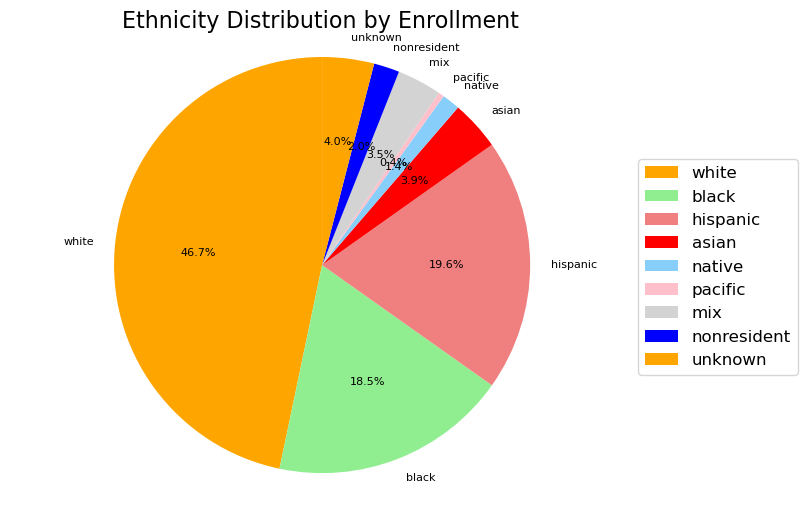

In [229]:
# Extract the required columns from the DataFrame
ethnicity_data = test_ethnicity_clean[[
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown"
]]

# Rename the columns to desired labels
ethnicity_data.columns = [
    "white",
    "black",
    "hispanic",
    "asian",
    "native",
    "pacific",
    "mix",
    "nonresident",
    "unknown"
]

# Count the occurrences of each ethnicity category
ethnicity_counts = ethnicity_data.sum().values

# Calculate the percentage of each ethnicity
total = sum(ethnicity_counts)
ethnicity_percentages = [count / total * 100 for count in ethnicity_counts]

# Define a custom color scheme
colors = ['orange', 'lightgreen', 'lightcoral', 'red', 'lightskyblue', 'pink', 'lightgray', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
patches, texts, _ = plt.pie(ethnicity_percentages, labels=ethnicity_data.columns, autopct='%1.1f%%', colors=colors,
                            startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)  # Increase labeldistance

# Add a title
plt.title('Ethnicity Distribution by Enrollment', fontsize=16)  # Increase the fontsize for better visibility

# Create a legend outside the pie chart
plt.legend(patches, ethnicity_data.columns, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()




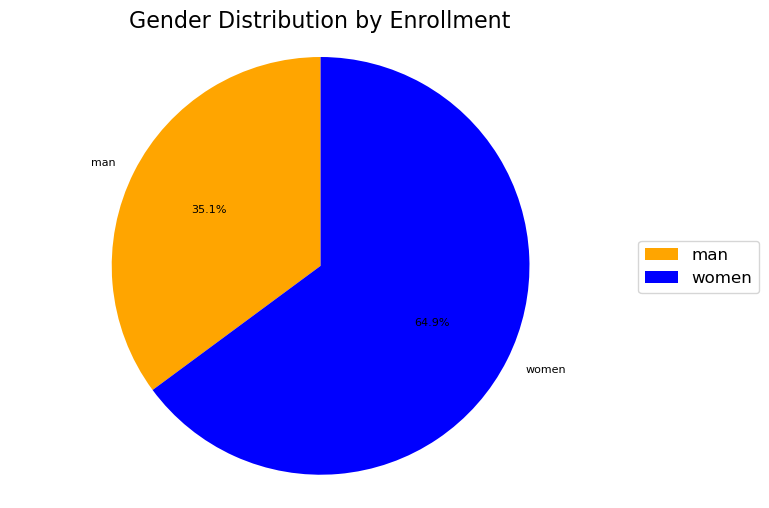

In [230]:
# Extract the required columns from the DataFrame
gender_data = test_ethnicity_clean[["enrollment_percentage_man", "enrollment_percentage_women"]]

# Remove "enrollment_percentage_" prefix from column names
column_names = [col.replace("enrollment_percentage_", "") for col in gender_data.columns]

# Calculate the sum of each gender category
gender_counts = gender_data.sum().values

# Calculate the total count
total = sum(gender_counts)

# Calculate the percentage of each gender
gender_percentages = [count / total * 100 for count in gender_counts]

# Define a custom color scheme
colors = ['orange', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, _, _ = plt.pie(gender_percentages, labels=column_names, autopct='%1.1f%%', colors=colors,
                        startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)

# Add a title
plt.title('Gender Distribution by Enrollment', fontsize=16)

# Create a legend outside the pie chart
plt.legend(patches, column_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()

### 3.2 Top and Bottom 10 colleges based on college count and distribution of their fields of study 

In [231]:
merge_collegelocation=pd.merge(test_location_clean, test_major_clean, on=["name", "id"], how="inner")

# Excluding the states out of mainland
merge_collegelocation= merge_collegelocation.loc[(merge_collegelocation["state"] != "MP") & 
                                                 (merge_collegelocation["state"] != "VI") & 
                                                 (merge_collegelocation["state"] != "PW") & 
                                                 (merge_collegelocation["state"] != "AS") &
                                                 (merge_collegelocation["state"] != "MH") &
                                                 (merge_collegelocation["state"] != "FM") &
                                                 (merge_collegelocation["state"] != "GU")]


state = merge_collegelocation.groupby("state")["name"].count()

count = pd.DataFrame(state)

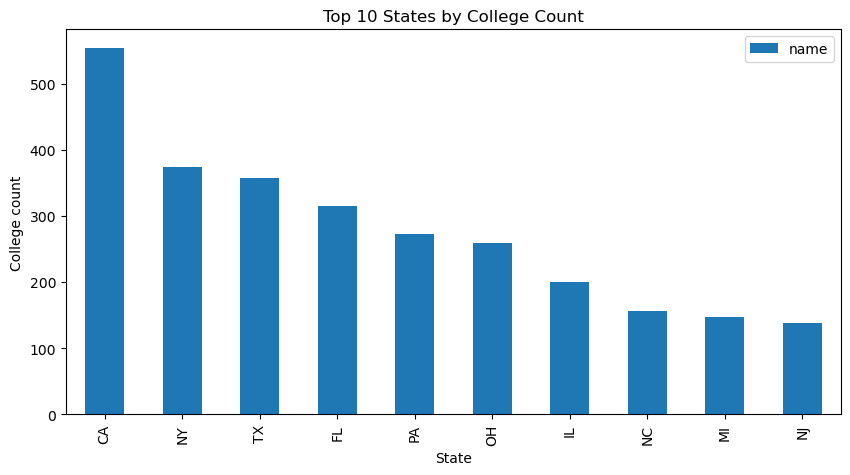

In [232]:
sorted_count = count.sort_values('name', ascending=False)

top_15 = sorted_count.head(10)

top_15.plot(kind='bar', title='Top 10 States by College Count', 
        ylabel='College count', xlabel='State', figsize=(10,5))

plt.show()

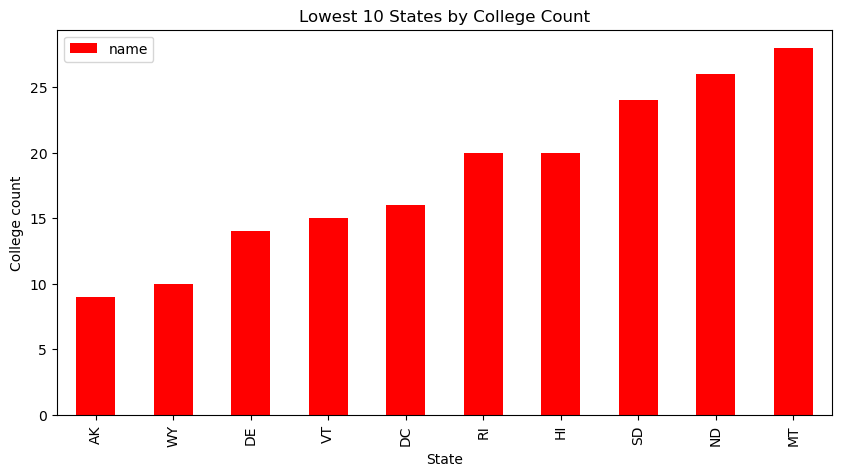

In [233]:
sorted_count = count.sort_values('name', ascending=True)

lowest_15 = sorted_count.head(10)

lowest_15.plot(kind='bar', title='Lowest 10 States by College Count', 
        ylabel='College count', xlabel='State', figsize=(10,5),color= "r")

plt.show()

In [234]:
#we calculated the total amounts in each column per major to determine the percentage of each major by state
merge_collegelocation['Max_Major'] = merge_collegelocation.loc[:,'percentage_of_agriculture_major':'percentage_of_history_major'].idxmax(axis=1)
# Remove the common prefix from the values in the column
merge_collegelocation['Max_Major'] = merge_collegelocation['Max_Major'].str.replace('percentage_of_', '').str.rstrip('_major')
#grouped the bar chart by state and major
major_by_state = merge_collegelocation.groupby(['state', 'Max_Major']).size().unstack()
#calculated and sorted the chart by total percentage of each major
major_by_state['Total'] = major_by_state.sum(axis=1)
major_by_state = major_by_state.sort_values('Total', ascending=False)


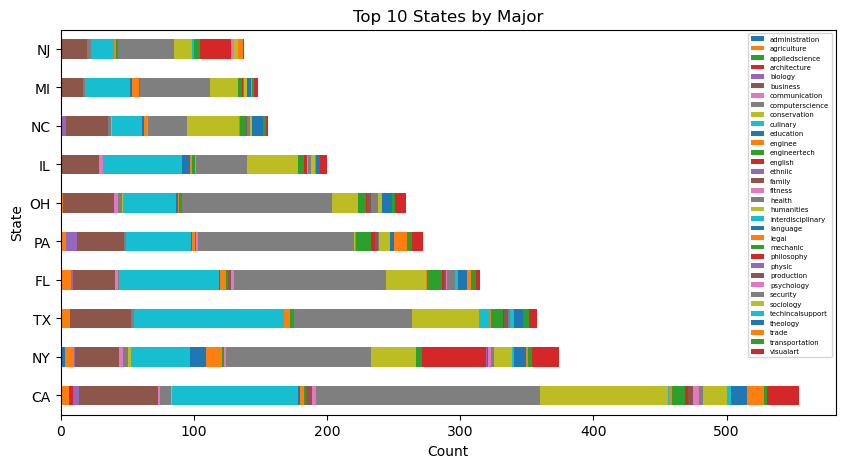

In [235]:
#created a horizontal bar chart while removing the "total" amount to make the chart more readable
top_10_states = major_by_state.head(10)
top_10_states = top_10_states.drop('Total',axis=1)
top_10_states.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top 10 States by Major')
#shrunk the legend
plt.legend().set_title('')
plt.legend(prop={'size': 5})

plt.show()

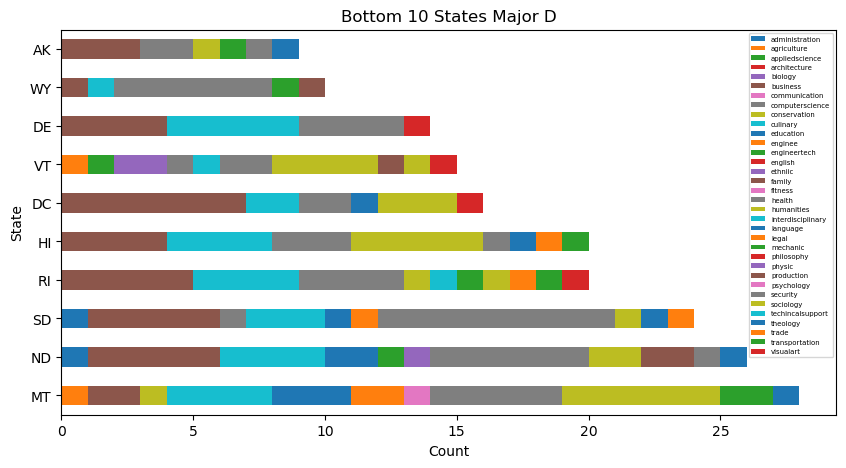

In [236]:
#removed outliers
states_to_exclude = ['GU', 'PW', 'VI', 'MH', 'FM', 'AS', 'MP']
major_by_state = major_by_state[~major_by_state.index.isin(states_to_exclude)]
lowest_10_states = major_by_state.tail(10)
lowest_10_states = lowest_10_states.drop('Total',axis=1)
lowest_10_states.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Bottom 10 States Major D')

plt.legend().set_title('')
plt.legend(prop={'size': 5})

plt.show()

### 3.3 Admission Cost in different geographical locations in USA for public and private colleges

In [237]:
## Tuition Visualization on Map
filter_data = pd.merge(test_location_clean, test_financial_clean, on = ['id','name'], how = 'inner')


# Excluding the states out of mainland
filter_data= filter_data.loc[(filter_data["state"] != "MP") & 
                             (filter_data["state"] != "VI") &
                             (filter_data["state"] != "PW") & 
                             (filter_data["state"] != "AS") &
                             (filter_data["state"] != "MH") &
                             (filter_data["state"] != "FM") &
                             (filter_data["state"] != "GU")]

# Select relevant columns for institution type data
institution_data = filter_data[["id", "name", "lat", "lng", "cost_of_admission","public/private"]]

# Convert latitude and longitude columns to float
institution_data["lat"] = institution_data["lat"].astype(float)
institution_data["lng"] = institution_data["lng"].astype(float)

# Group categories 2 and 3 together as category 2
institution_data["public/private"] = institution_data["public/private"].replace(3, 2)

# Define the color mapping for institution types
color_mapping = {1: "blue", 2: "red"}

# Create a separate map for category 1
category_1_data = institution_data[institution_data["public/private"] == 1]
category_1_map = category_1_data.hvplot.points(
    "lng",
    "lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    color="public/private",
    cmap=color_mapping,
    size="cost_of_admission",
    alpha=0.5,
    scale=0.03,
    hover_cols=["name", "public/private"],
    legend=True,
    title="Map for Public Schools"
)

# Create a separate map for categories 2 and 3 combined
categories_2_3_data = institution_data[institution_data["public/private"] == 2]
categories_2_3_map = categories_2_3_data.hvplot.points(
    "lng",
    "lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    color="public/private",
    cmap=color_mapping,
    size="cost_of_admission",
    alpha=0.5,
    scale=0.03,
    hover_cols=["name", "public/private"],
    legend=True,
    title="Map for Private Schools (Not-for Profit and For- Profit)"
)

# Display the maps
display(category_1_map)
display(categories_2_3_map)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (public/private,cost_of_admission,name)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (public/private,cost_of_admission,name)

### 3.4 Admission Cost Analysis for Public and Private colleges

In [11]:
# Selecting needed columns
select_columns = raw_data[["UNITID", "INSTNM", "CONTROL", "OPENADMP", 
                          "ADM_RATE", "ADM_RATE_ALL", "COSTT4_A", "COSTT4_P"]]

# Dropping rows where both cost columns have null
clean_df = select_columns.dropna(subset=['COSTT4_A', 'COSTT4_P'], how='all')
# Merging cost and admission columns
clean_df["cost_merged"] = clean_df["COSTT4_A"].combine_first(clean_df["COSTT4_P"])
clean_df["adm_merged"] = clean_df["ADM_RATE"].combine_first(clean_df["ADM_RATE_ALL"])
#selecting only the needed columns
new_clean_df = clean_df[["UNITID", "INSTNM", "CONTROL", "OPENADMP","cost_merged" ]]
new_clean_df.head(5)


,UNITID,INSTNM,CONTROL,OPENADMP,cost_merged
0,100654,Alabama A & M University,1,2.0,21924.0
1,100663,University of Alabama at Birmingham,1,2.0,26248.0
3,100706,University of Alabama in Huntsville,1,2.0,24869.0
4,100724,Alabama State University,1,2.0,21938.0
5,100751,The University of Alabama,1,2.0,31050.0


In [12]:
# Grouping by open adm to get number of colleges in open and non open
group = new_clean_df.groupby("OPENADMP")["UNITID"].count()
group_df = pd.DataFrame(group)
group_df_reset = group_df.reset_index()
group_df_reset

,OPENADMP,UNITID
0,1.0,3412
1,2.0,1883


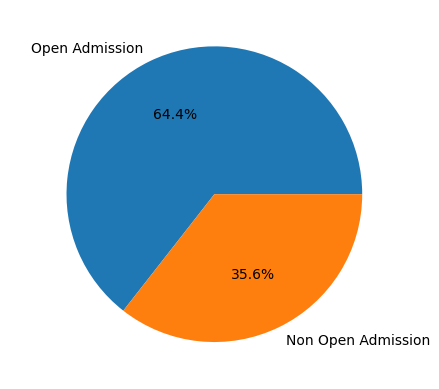

In [13]:
# Displaying percentage of open vs non open colleges
labels = ["Open Admission", "Non Open Admission"]
ax = group_df_reset.plot.pie(y='UNITID', labels=labels, autopct='%1.1f%%')
ax.set_ylabel(" ")
ax.legend().set_visible(False)
plt.show()

In [14]:
# Grouping by openadm and control

combine = new_clean_df.groupby(["OPENADMP", "CONTROL"])["cost_merged"].mean().round()
combine_df = pd.DataFrame(combine)
combine_df_reset = combine_df.reset_index()
combine_df_reset


,OPENADMP,CONTROL,cost_merged
0,1.0,1,14090.0
1,1.0,2,23600.0
2,1.0,3,23356.0
3,2.0,1,22295.0
4,2.0,2,44954.0
5,2.0,3,30837.0


In [15]:
# Making the df to pivot so it can be used to plot
pivot = pd.pivot_table(data=combine_df_reset, index=['CONTROL'], 
                       columns=['OPENADMP'], values='cost_merged')
pivot

OPENADMP,1.0,2.0
CONTROL,,
1,14090.0,22295.0
2,23600.0,44954.0
3,23356.0,30837.0


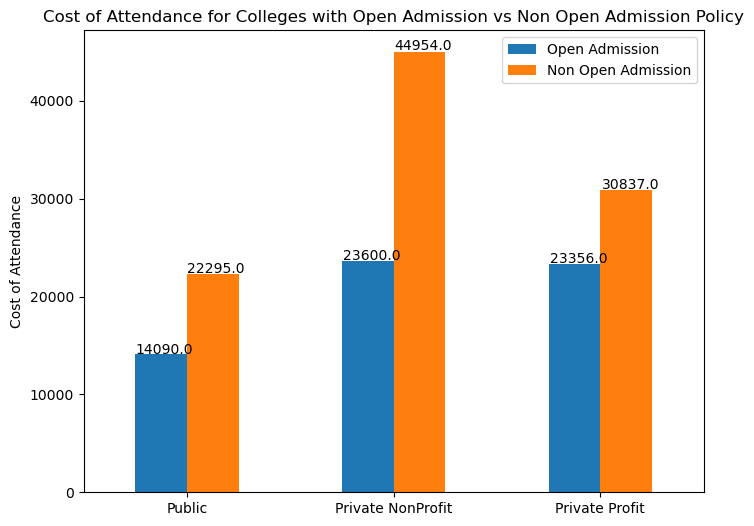

In [16]:
#plotting barchart
cb = pivot.plot(kind='bar', figsize=(8,6), title="Cost of Attendance for Colleges with Open Admission vs Non Open Admission Policy")
combined_labels = ['Public', 'Private NonProfit', 'Private Profit']
cb.set_xticklabels(combined_labels, rotation=360)
cb.set_xlabel("")
cb.set_ylabel("Cost of Attendance")
plt.legend(["Open Admission", "Non Open Admission"])
for p in cb.patches:
    cb.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


#### t-test For Cost of Public and Private Colleges

In [26]:
# NULL HYPOTHESIS: There is no difference between public and private

# Split the dataset into public and private colleges
public_colleges = new_clean_df[new_clean_df['CONTROL'] == 1]['cost_merged']
private_colleges = new_clean_df[(new_clean_df['CONTROL'] == 3)| (new_clean_df['CONTROL'] == 2)]['cost_merged']

# Perform independent two-sample t-test assuming equal variances
t_statistic, p_value = ttest_ind(public_colleges, private_colleges, equal_var=False)

# Set the significance level
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("There is significant difference in the average cost between public and private colleges.")
else:
    print("There is no significant difference in the average cost between public and private colleges.")

p_value

There is significant difference in the average cost between public and private colleges.


0.0

#### t-test For Cost of Open and Non Open Admission Colleges

In [27]:
# NULL HYPOTHESIS: There is  no difference between open and non open admission

# Split the dataset into public and private colleges
open_colleges = new_clean_df[new_clean_df['OPENADMP'] == 1]['cost_merged']
nonopen_colleges = new_clean_df[(new_clean_df['OPENADMP'] == 2) | (new_clean_df['OPENADMP'] == 3)]['cost_merged']

# Perform independent two-sample t-test assuming equal variances
t_statistic, p_value = ttest_ind(open_colleges, nonopen_colleges, equal_var=False)

# Set the significance level
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("There is significant difference in the average cost between open and non open admission colleges.")
else:
    print("There is no significant difference in the average cost between open and non open admission colleges.")

p_value

There is significant difference in the average cost between open and non open admission colleges.


1.0504334677664811e-266

#### Correlation testing between Admission Cost and Admission Rate

In [31]:
# Admission Rate vs Admission Cost
# filtering to get all non open admission  public colleges
adm_clean_df = clean_df[["UNITID", "INSTNM", "CONTROL", "OPENADMP","cost_merged", "adm_merged" ]]
adm_loc = adm_clean_df.loc[(adm_clean_df["OPENADMP"]== 2.0) | (adm_clean_df["OPENADMP"]== 3.0)]

#dropping null values if any in admission requiremnt column
adm_cost = adm_loc .dropna(subset=["adm_merged"])
adm_cost["adm_merged"] = (adm_cost[["adm_merged"]]*100).round()
len(adm_cost)

1876

<Axes: >

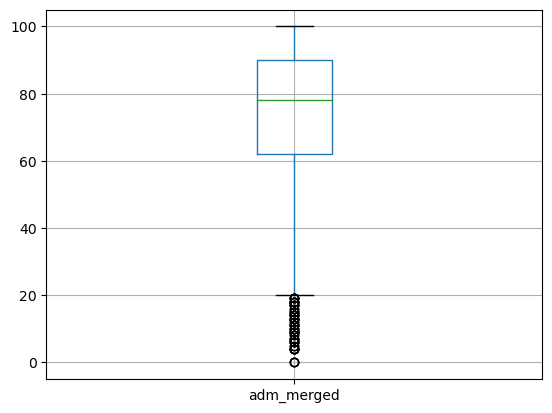

In [29]:
#box plot for admission column
adm_cost.boxplot(column=['adm_merged'])

In [32]:
# Removing outliers using iqr
# Calculate the IQR for each column
Q1_col1 = adm_cost['cost_merged'].quantile(0.25)
Q3_col1 = adm_cost['cost_merged'].quantile(0.75)
IQR_col1 = Q3_col1 - Q1_col1

Q1_col2 = adm_cost['adm_merged'].quantile(0.25)
Q3_col2 = adm_cost['adm_merged'].quantile(0.75)
IQR_col2 = Q3_col2 - Q1_col2

# Define the lower and upper bounds for outlier detection
lower_bound_col1 = Q1_col1 - 1.5 * IQR_col1
upper_bound_col1 = Q3_col1 + 1.5 * IQR_col1

lower_bound_col2 = Q1_col2 - 1.5 * IQR_col2
upper_bound_col2 = Q3_col2 + 1.5 * IQR_col2


# Filter out rows with values outside the lower and upper bounds for both columns
df_no_outliers = adm_cost[(adm_cost['cost_merged'] >= lower_bound_col1) & 
                          (adm_cost['cost_merged'] <= upper_bound_col1) & 
                          (adm_cost['adm_merged'] >= lower_bound_col2) & 
                          (adm_cost['adm_merged'] <= upper_bound_col2)]
                          
len(df_no_outliers)

1806

The correlation between cost and admission rate for public is -0.2


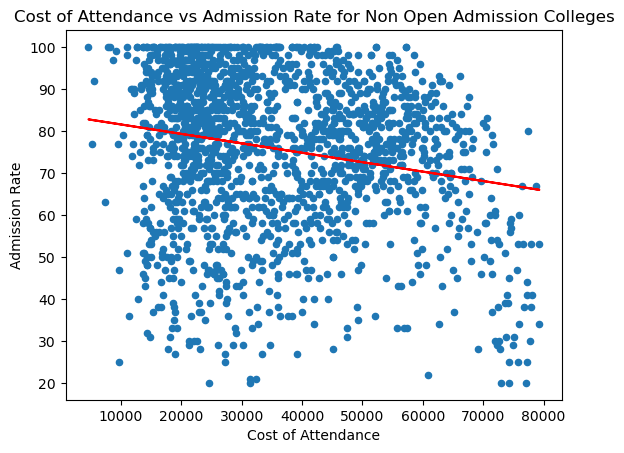

In [33]:
# Creating scatter plot for admission rate vs cost(without outliers)

pb_sc_ot= df_no_outliers.plot.scatter(x="cost_merged", y="adm_merged", 
                                   title="Cost of Attendance vs Admission Rate for Non Open Admission Colleges")
pb_sc_ot.set_xlabel("Cost of Attendance")
pb_sc_ot.set_ylabel("Admission Rate")
cost = df_no_outliers["cost_merged"]
adm_rate = df_no_outliers["adm_merged"]
m, b = np.polyfit(cost, adm_rate, 1)
plt.plot(cost, m*cost+b, color='red', label='x={:.2f}y+{:.2f}'.format(m,b))

correlation = stats.pearsonr(cost, adm_rate)
print(f"The correlation between cost and admission rate for public is {round(correlation[0],2)}")

### 3.5 Linearity testing for Number of students who receive federal loan vs Admission Cost

In [243]:
# Preparing datasets for analysis
filter_data = pd.merge(test_location_clean, test_financial_clean, on = ["id","name"], how = "inner")

filter_data["student_number_pellgrant"] = filter_data["percentage_of_pellgrant"] * filter_data["student_count"]
filter_data["student_number_federalloan"] = filter_data["percentage_of_federalloan"] * filter_data["student_count"]

select_data = filter_data[["id",
                            "name",
                            "cost_of_admission",
                            "public/private",
                            "student_number_pellgrant",
                            "student_number_federalloan",
                            "percentage_of_pellgrant",
                            "percentage_of_federalloan"
                            
]]

In [244]:
# Linear Regression modeling
analysis1_data = select_data.loc[select_data["public/private"] == 1, :]

x_values = analysis1_data["cost_of_admission"]
y_values = analysis1_data["student_number_federalloan"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

The r-squared is: 0.5068787092355779


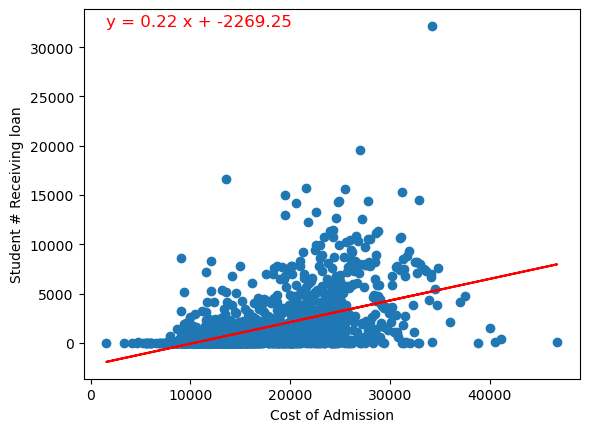

In [245]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Cost of Admission")
plt.ylabel("Student # Receiving loan")
print(f"The r-squared is: {rvalue}")
plt.show() 

In [246]:
# Linear Regression modeling
analysis2_data = select_data.loc[select_data["public/private"] != 1, :]

x_values = analysis2_data["cost_of_admission"]
y_values = analysis2_data["student_number_federalloan"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

The r-squared is: 0.1680777690625478


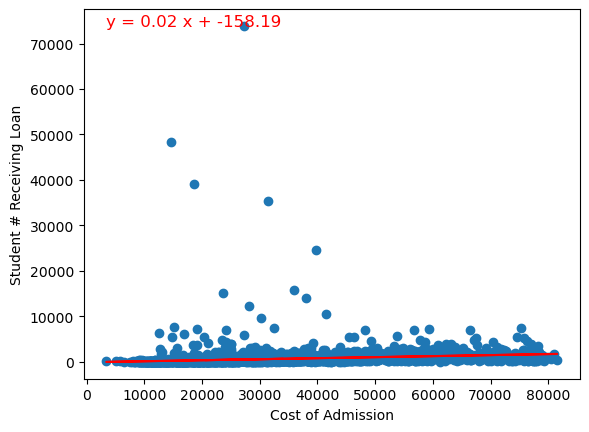

In [247]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Cost of Admission")
plt.ylabel("Student # Receiving Loan")
print(f"The r-squared is: {rvalue}")
plt.show() 

As part of our analysis, we sought to examine the relationship between the number of students receiving federal loans and the admission cost, focusing on public and private institutions separately. In the case of public colleges, we discovered a strong and significant linear relationship between these two variables, indicating that as the number of students receiving federal loans increased, the admission cost tended to follow a predictable pattern. However, when exploring private colleges, we found a substantially weaker relationship between the number of loan recipients and the admission cost. This suggests that other factors may have a more dominant influence on the cost of admission in private institutions, making the relationship less apparent or less consistent.

#### Hypothesis Testing

Independent t-tests will compare the means of 2 independent populations.

* **Assumptions**

    * Data is normally distributed
    * Data is independent
    * Data is homogenous (The standard deviations are roughly equal)

In [248]:
population1 = select_data.loc[select_data["public/private"] == 1, :]["cost_of_admission"]

population2 = select_data.loc[select_data["public/private"] != 1, :]["cost_of_admission"]

*$H_{0}$*: The averages of the samples are the same.

*$H_{1}$*: The averages of the samples are different.

In [249]:
def gendata(loc1=0, loc2=0):

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="public school")
    plt.scatter(range(len(population2)), population2, label="private school")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="public school")
    plt.hist(population2, 10, density=True, alpha=0.7, label="private school")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

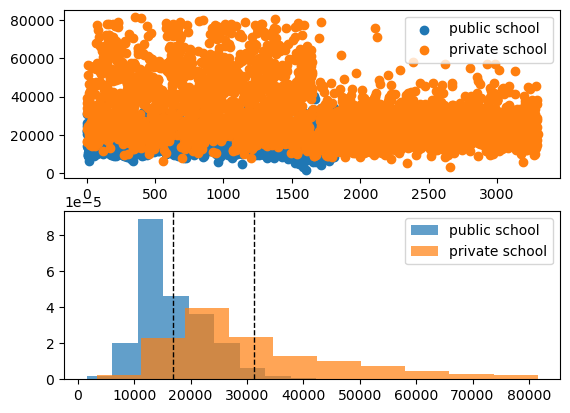

In [250]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [251]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-47.8970591011592, pvalue=0.0)

In [252]:
# Perform independent two-sample t-test assuming equal variances
t_statistic, p_value = stats.ttest_ind(population1, population2, equal_var=False)

# Set the significance level
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("There is significant difference in the average cost between public and private colleges.")
else:
    print("There is no significant difference in the average cost between public and private colleges.")


There is significant difference in the average cost between public and private colleges.


In this analysis, we investigated the admission cost between private and public schools. The data used for testing was obtained from a DataFrame named select_data, which includes a categorical column indicating the school type as "public/private" and another column representing the cost of admission. We separated the data into two populations: population1 consisting of the admission costs for public schools (coded as 1) and population2 consisting of the admission costs for private schools (coded as 2 and 3).

To gain insights into the distribution of the data, scatter plots and histograms were generated. The scatter plot displayed the admission costs of both populations, while the histograms illustrated the distributions of admission costs for public and private schools separately. The mean admission costs were marked by dashed lines on the histograms.

To assess whether there was a statistically significant difference in the admission costs between public and private schools, an independent t-test was conducted using the stats.ttest_ind() function with the argument equal_var=False, which performs Welch's t-test to account for potentially unequal population variances. The resulting p-value from the t-test was found to be very small, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the admission costs between public and private schools.

### 4. Conclustion

In conclusion, our analysis sheds light on the cost of admission and the distribution of gender, ethnicity, and fields of study among colleges. Regarding the cost of admission, we found that the average admission costs vary significantly across different types of colleges which was confirmed by t-test. Another factor we learned is that colleges with open admission policy were lower in cost than colleges that have admission requirements. 

For public colleges, we found a significant linear relationship between the number of loan recipients and the admission cost. On the other hand, when exploring private colleges, we observed a weaker relationship between the number of loan recipients and the admission cost, indicating that other factors may have a more dominant influence on the cost of admission in private institutions. In terms of gender and ethnicity distribution, we observed varying levels of representation among colleges and analyzing the distribution of fields of study revealed interesting patterns.
These findings highlight the importance of considering the type of institution when making college choices, as the cost of admission can vary significantly. Prospective students should carefully evaluate their financial situation, academic goals, and the overall value provided by public and private colleges to make informed decisions that align with their needs and aspirations.